# Learn XOR using a Neural Network

For demonstration purposes, we learn neural network models of increasing complexity implementing the XOR function. Eventually, we will arrive at the model suggested in this [tutorial](https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html).

## Imports

In [26]:
!pip install numpy 
!pip install tensorflow 
!pip install sklearn 

In [2]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

## Create the XOR function as data

In [3]:
# Create XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Y = np.array([[0],[1],[1],[0]], "float32")

# Dataset shape
print("Input: {0}".format(X.shape))
print("Output: {0}".format(Y.shape))

Input: (4, 2)
Output: (4, 1)


## Model 1

Define and train a too trivial neural network model: one neuron, three parameters, purely linear and, hence, it misses 50% of the right answers.

In [4]:
# Define the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='linear'))

# Compile the model
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

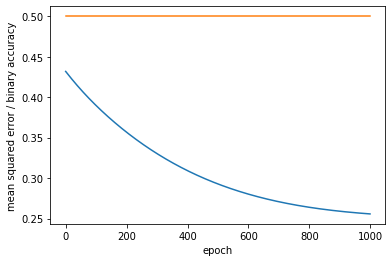

In [5]:
# Train the model
history = model1.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [6]:
preds = model1.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.26
Binary accuracy: 0.50


In [7]:
preds

array([[0.42271736],
       [0.57311916],
       [0.4248272 ],
       [0.575229  ]], dtype=float32)

Use the model

In [8]:
def my_xor(x1,x2,m):
    """Return x1 XOR x2."""
    res =  m.predict(np.array([[x1,x2]], "float32")).round()
    return int(res[0][0])

In [9]:
print(format(my_xor(0,0, model1)))
print(format(my_xor(0,1, model1)))
print(format(my_xor(1,0, model1)))
print(format(my_xor(1,1, model1)))

0
1
0
1


## Model 2

The slightly more complex neural network model introduces a sigmpod activation function. It is hence not linear anymore. However, one neuron is not enough. Its accuracy does not improve.

In [10]:
# Define the model
model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

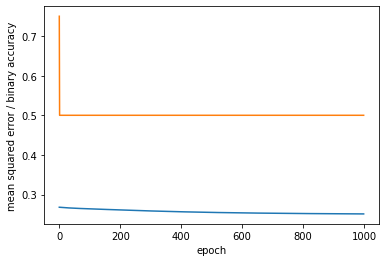

In [11]:
# Train the model
history = model2.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [12]:
preds = model2.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [13]:
preds

array([[0.5361939 ],
       [0.47213334],
       [0.5319344 ],
       [0.46786934]], dtype=float32)

Use the model

In [14]:
print(format(my_xor(0,0, model2)))
print(format(my_xor(0,1, model2)))
print(format(my_xor(1,0, model2)))
print(format(my_xor(1,1, model2)))

1
0
1
0


## Model 3

We add a hidden layer with 32 neurons and a linear activation function:

In [15]:
# Define the model
model3 = Sequential()
model3.add(Dense(32, input_dim=2, activation='linear'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

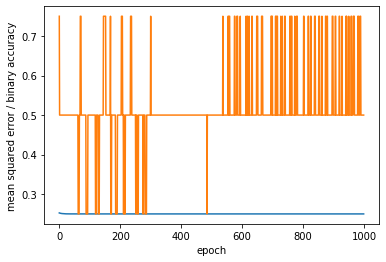

In [16]:
# Train the model
history = model3.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [17]:
preds = model3.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [18]:
preds

array([[0.5       ],
       [0.5       ],
       [0.49999997],
       [0.5       ]], dtype=float32)

Use the model

In [19]:
print(format(my_xor(0,0, model3)))
print(format(my_xor(0,1, model3)))
print(format(my_xor(1,0, model3)))
print(format(my_xor(1,1, model3)))

0
0
0
0


## Model 4

Finally we change the linear activation of the hidden layer to a relu activation, define and train the neural network model:

In [20]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

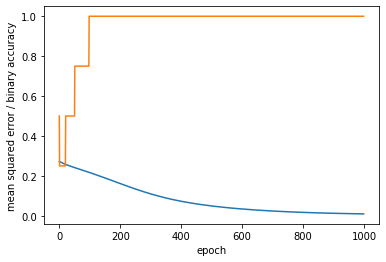

In [21]:
# Train the model
history = model.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [22]:
preds = model.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.01
Binary accuracy: 1.00


In [23]:
preds

array([[0.14475194],
       [0.9244654 ],
       [0.9268966 ],
       [0.07123953]], dtype=float32)

Use the model

In [24]:
print(format(my_xor(0,0, model)))
print(format(my_xor(0,1, model)))
print(format(my_xor(1,0, model)))
print(format(my_xor(1,1, model)))

0
1
1
0


In [25]:
model.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[ 0.4752685 ,  0.29889202, -0.05199039,  0.6625899 ,  0.7172959 ,
          0.47732452,  0.20604147,  0.4899693 , -0.80967176,  0.47658485,
         -0.76378703,  0.3735639 ,  0.16143039, -0.2048247 ,  0.58723867,
          0.6696521 , -0.11431956, -0.17997962,  0.35649452,  0.10407724,
          0.89750767,  0.11606059,  0.08218018,  0.18097451,  0.70602524,
          0.79454184, -0.62858886, -0.26776463,  0.5558976 , -0.09330717,
          0.62151504, -0.21584314],
        [ 0.47509325,  0.836385  , -0.09845328,  0.66240025, -0.7172494 ,
          0.4765322 ,  0.20635258,  0.48957023,  0.9857968 ,  0.4766292 ,
          1.1107994 ,  0.95158887,  0.1866516 ,  0.03362976, -0.58696944,
         -0.66954607, -0.04380065,  0.39783907,  0.35638848, -0.34195316,
         -0.8975288 , -0.29303405, -0.3827301 , -0.1946126 , -0.7058685 ,
         -0.79456675,  0.78941023, -0.06804919, -0.5557817 , -0.02574354,
       